$$
\def\vc#1{\mathbf{#1}}
\def\vv{\vc v}
\def\xx{\vc x}
$$
# NTI/CFD Cvičení 2
## Advekční rovnice
Advekční rovnice
$$ \partial_t \Phi + \nabla\cdot(\vv \Phi) = f $$
popisuje transport veličiny $\Phi$ proudovým polem $\vv $.
Příkladem je bilance hmoty, kde $\Phi=\varrho$ a $f=0$.

## Úloha 1
Jednorozměrnou trubicí $(-L,L)$ proudí znečištěná voda konstantní rychlostí $V$ [$m/s$].
V čase $t=0$ je koncentrace znečištění dána funkcí $\Phi_0(x)$ [$kg/m$], na vstupu ($x=-L$) vtéká čistá voda.
Objemový zdroj znečištění je $f=0$.
* Ukažte, že řešením advekční rovnice je "cestující vlna", tj. funkce
$$ \Phi(t,x)=\begin{cases}\Phi_0(x-Vt) & \mbox{pokud }-L\le x-Vt \le L,\\0 & \mbox{jinak}.\end{cases} $$

$$ \frac{\partial\Phi}{\partial t} = -V{\Phi_0'}(x-Vt) $$
$$ \nabla\cdot(\vv\Phi) = V\Phi_0'(x-Vt) $$

* V čem se bude řešení lišit od reálného experimentu?

* Pro konkrétní parametry $L=5$, $V=2$ a $\Phi_0(x)=\frac1{1+x^2}$ nakreslete průběh koncentrace v trubce v časech $0$, $0.5$ a $2.5$.

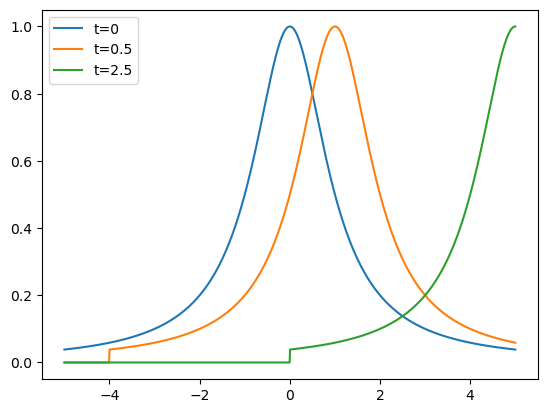

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# rychlost
V = 2
# polovina delky trubky
L = 5
# analyticke reseni
def phi(t,x):
    return 1/(1+(x-V*t)*(x-V*t)) * (-L <= x - V*t) * (x - V*t <= L)

# upravte kod nize tak, aby vykreslil reseni v zadanych casech
xx = np.linspace(-L,L,1000)
for t in [0, 0.5, 2.5]:
    yy = phi(t,xx)
    plt.plot(xx,yy)

plt.legend(['t=0', 't=0.5', 't=2.5'])
plt.show()

## Úloha 2
Řešte advekční rovnici z úlohy 1 pomocí metody konečných objemů.
* Zvolte vhodný časový a prostorový krok $\Delta t$, $h$. Definujte matice $\mathbb K$, $\mathbb M$ a vektor pravých stran $\vc b$ podle následujících vztahů:
$$ \mathbb K_{ij} = \begin{cases}-\frac{V}{h} & \mbox{pokud }j=i-1,\\\frac{V}{h} & \mbox{pro }i=j,\\0 & \mbox{jinak},\end{cases}\qquad \mathbb M = \mathbb I-\Delta t\mathbb K, \qquad \vc b = \vc 0. $$
* Definujte vektor $\vc\Phi^0$ počátečních hodnot koncentrace $\Phi_0$ ve středech elementů.
* Pro každý diskrétní čas $t_k$, $k=1,2,...$ vypočítejte $\vc\Phi^k$ s využitím rovnice $\vc\Phi^{k}=\mathbb M\vc\Phi^{k-1} + \Delta t\vc b$.
* Vykreslete obdobně jako výše numerické řešení v časech $0$, $0.5$ a $2.5$.

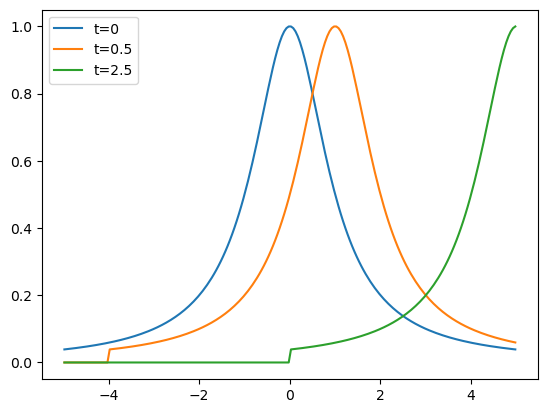

In [19]:
import math

# koncovy cas
T = 2.5
# pocet casovych intervalu a casovy krok
nt = 100
dt = T/nt

# pocet elementu a prostorovy krok
nx = 200
h = 2*L/nx

# matice a vektor pravych stran MKO
K = V/h * ( np.eye(nx) - np.diag(np.ones(nx-1),-1) )
b = np.zeros(nx)
M = np.eye(nx) - dt*K

# souradnice stredu elementu
xx = np.linspace(-L+h/2,L-h/2,nx)
# pocatecni koncentrace
pp = phi(0,xx)
plt.clf()
plt.plot(xx,pp)
labels = ['t=0']

# vypocet reseni v jednotlivych casech
for i in range(nt):
    t = (i+1)*dt
    pp = M@pp + dt*b
    if (math.isclose(t,0.5)) or (math.isclose(t,2.5)):
        plt.plot(xx,pp)
        labels.append('t='+str(t))
        
plt.legend(labels)
plt.show()

* Vyzkoušejte různé kombinace časového a prostorového kroku. Co lze vypozorovat? V jakých případech numerické řešení vykazuje nepřesnosti?